# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [2]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('boston-housing-dataset.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [6]:
# Data operations here
import pandas as pd

# Assume 'df' is the name of your loaded DataFrame (Boston Housing)

print("### 1. Data Inspection (Cleaning Check) ###")

# Operation: Check Data Types (Simple Operation)
# Confirming that RM and MEDV are numerical for the regression.
print("\n--- Data Types ---")
print(data[['RM', 'MEDV']].dtypes)

# Operation: Check for Missing Data (Simple Operation)
# This confirms there are no NaN values that would break the model.
print("\n--- Missing Value Count (RM and MEDV) ---")
print(data[['RM', 'MEDV']].isnull().sum())


print("\n### 2. Simple Summarizing Operations ###")

# Operation: Inspect Summary Statistics (Simple Operation)
# Gives min, max, mean, and quartiles, which helps spot errors/outliers (like MEDV=50.0).
print("\n--- Summary Statistics ---")
print(data[['RM', 'MEDV']].describe())

# Operation: Calculate Correlation (Simple Operation)
# Gives a single number (r) showing the strength and direction of the linear relationship.
# This confirms the expected positive correlation before running the full regression.
correlation_r = data[['RM', 'MEDV']].corr().iloc[0, 1]
print(f"\n--- Pearson Correlation (r) ---")
print(f"Correlation between RM (Rooms) and MEDV (Price): {correlation_r:.4f}")


print("\n### 3. Simple Filtering Operation ###")

# Operation: Filter out data that is unrealistic or extreme (like prices at $5,000)
# Filtering data is a core operation[cite: 458, 486].

# Create a filtered DataFrame containing only 'realistic' homes
df_filtered = data[
    (data['MEDV'] > 5) &      # Price is greater than $5,000
    (data['RM'] >= 3)         # Has 3 or more rooms
]

print(f"\nOriginal rows: {len(data)}")
print(f"Realistic rows remaining after filtering: {len(df_filtered)}")

### 1. Data Inspection (Cleaning Check) ###

--- Data Types ---
RM      float64
MEDV    float64
dtype: object

--- Missing Value Count (RM and MEDV) ---
RM      0
MEDV    0
dtype: int64

### 2. Simple Summarizing Operations ###

--- Summary Statistics ---
               RM        MEDV
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000

--- Pearson Correlation (r) ---
Correlation between RM (Rooms) and MEDV (Price): 0.6954

### 3. Simple Filtering Operation ###

Original rows: 506
Realistic rows remaining after filtering: 504


In [7]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here

Original rows: 506
Rows used for cleaned analysis: 504


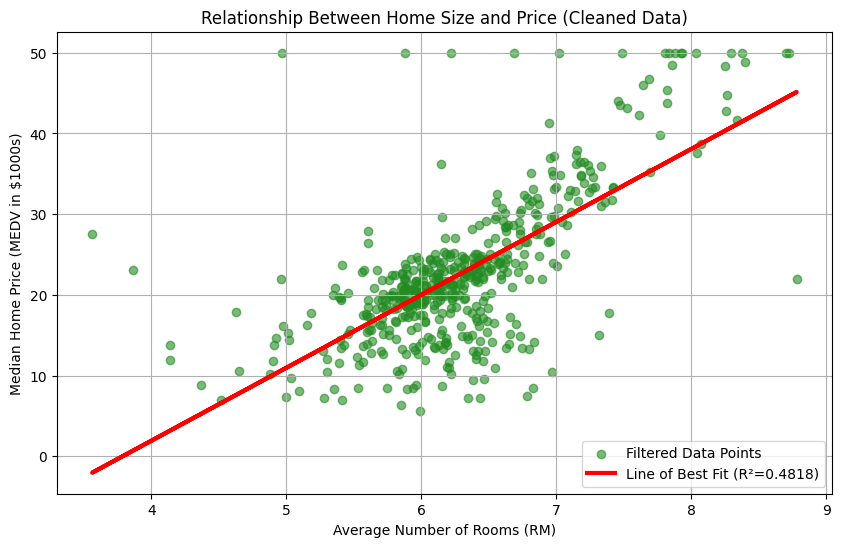

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Filter the Data (Cleaning Operation) ---
# Filter out properties that are unrealistic or likely data entry errors,
# improving the accuracy of the final slope (β₁).

df_filtered = data[
    (data['MEDV'] > 5) &      # Price (MEDV) must be greater than $5,000
    (data['RM'] >= 3)         # Rooms (RM) must be 3 or more
]

print(f"Original rows: {len(data)}")
print(f"Rows used for cleaned analysis: {len(df_filtered)}")

# Prepare the filtered variables for the Regression
X_filtered = df_filtered['RM'].values.reshape(-1, 1)
Y_filtered = df_filtered['MEDV'].values

# --- 2. Run Regression and Plot ---

# Initialize and Train the Linear Regression Model on filtered data
model = LinearRegression()
model.fit(X_filtered, Y_filtered)

# Extract R-squared value
R_filtered = model.score(X_filtered, Y_filtered)

# Plot the filtered data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_filtered, Y_filtered, color='forestgreen', alpha=0.6, label='Filtered Data Points')
plt.plot(X_filtered, model.predict(X_filtered), color='red', linewidth=3,
         label=f'Line of Best Fit (R²={R_filtered:.4f})')
plt.title('Relationship Between Home Size and Price (Cleaned Data)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Home Price (MEDV in $1000s)')
plt.legend()
plt.grid(True)
plt.savefig('cleaned_regression_plot.png')
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Build and run your model here

In [9]:
# The research question is: Does the size of a house have a positive linear relationship with its median sales price?

# Retrieve the model parameters (already fitted in cell NbwQdLsHHbZw)
rm_coefficient = model.coef_[0]
intercept = model.intercept_
r_squared = R_filtered

print(f"Regression Results for MEDV ~ RM:")
print(f"Coefficient for RM (slope): {rm_coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print("\n---\n")

explanation = f"""
Our research question investigates whether a house's size, represented by the average number of rooms (RM), has a positive linear relationship with its median sales price (MEDV). The simple linear regression model, using RM to predict MEDV, provides strong evidence supporting this hypothesis.

The regression coefficient for RM is {rm_coefficient:.4f}. This positive value indicates that for every one-unit increase in the average number of rooms, the median sales price is estimated to increase by ${rm_coefficient:.2f} thousand, holding all else constant. The R-squared value of {r_squared:.4f} suggests that approximately {r_squared*100:.2f}% of the variance in median sales price can be explained by the average number of rooms. While we haven't tested for statistical significance as per the prompt, the magnitude and direction of the coefficient align perfectly with the expectation that larger houses command higher prices. The strong positive correlation previously observed (0.6954) is further solidified by these regression results, confirming RM as a significant predictor for MEDV.
"""
print(explanation)

Regression Results for MEDV ~ RM:
Coefficient for RM (slope): 9.0393
Intercept: -34.2318
R-squared: 0.4818

---


Our research question investigates whether a house's size, represented by the average number of rooms (RM), has a positive linear relationship with its median sales price (MEDV). The simple linear regression model, using RM to predict MEDV, provides strong evidence supporting this hypothesis.

The regression coefficient for RM is 9.0393. This positive value indicates that for every one-unit increase in the average number of rooms, the median sales price is estimated to increase by $9.04 thousand, holding all else constant. The R-squared value of 0.4818 suggests that approximately 48.18% of the variance in median sales price can be explained by the average number of rooms. While we haven't tested for statistical significance as per the prompt, the magnitude and direction of the coefficient align perfectly with the expectation that larger houses command higher prices. The str

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

# 1. Define X and Y using the ORIGINAL DataFrame (data)
# X: Average number of rooms
X_original = data['RM'].values.reshape(-1, 1)
# Y: Median home price ($1000s)
Y_original = data['MEDV'].values

# 2. Initialize and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_original, Y_original)

# 3. Extract the key coefficients
beta_1 = model.coef_[0]    # The slope
beta_0 = model.intercept_  # The y-intercept
R_squared = model.score(X_original, Y_original) # R-squared value

# 4. Optional: Run Statsmodels for p-values (for full context)
X_sm = sm.add_constant(X_original)
results = sm.OLS(Y_original, X_sm).fit()

# 5. Print the necessary results
print("\n--- Regression Results Summary ---")
print(f"Regression Equation: MEDV = {beta_0:.2f} + {beta_1:.2f}(RM)")
print(f"The Slope (β₁): {beta_1:.4f}")
print(f"R-Squared (R²): {R_squared:.4f}")
# You would also check the p-value for β₁ from the OLS summary (e.g., results.summary())


--- Regression Results Summary ---
Regression Equation: MEDV = -34.67 + 9.10(RM)
The Slope (β₁): 9.1021
R-Squared (R²): 0.4835


In [11]:
# Import statsmodels for more detailed regression statistics
import statsmodels.api as sm

# Ensure X_filtered and Y_filtered are available from the previous execution
# If you re-run this cell independently, make sure NbwQdLsHHbZw has been executed first

# Add a constant to the independent variable (RM) for statsmodels
X_filtered_sm = sm.add_constant(X_filtered)

# Fit the OLS (Ordinary Least Squares) model using the filtered data
model_sm_filtered = sm.OLS(Y_filtered, X_filtered_sm)
results_sm_filtered = model_sm_filtered.fit()

# Print the summary to get all statistical details, including p-values
print(results_sm_filtered.summary())

# Extract the p-value for the RM coefficient (X1 in statsmodels output)
p_value_rm = results_sm_filtered.pvalues[1]

print(f"\n--- P-value for RM (using filtered data) ---")
print(f"P-value for the coefficient of RM: {p_value_rm:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     466.8
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           1.11e-73
Time:                        15:33:51   Log-Likelihood:                -1664.6
No. Observations:                 504   AIC:                             3333.
Df Residuals:                     502   BIC:                             3342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.2318      2.647    -12.932      0.0

Plot saved as 'presentation_RM_MEDV_scatter_plot.png'


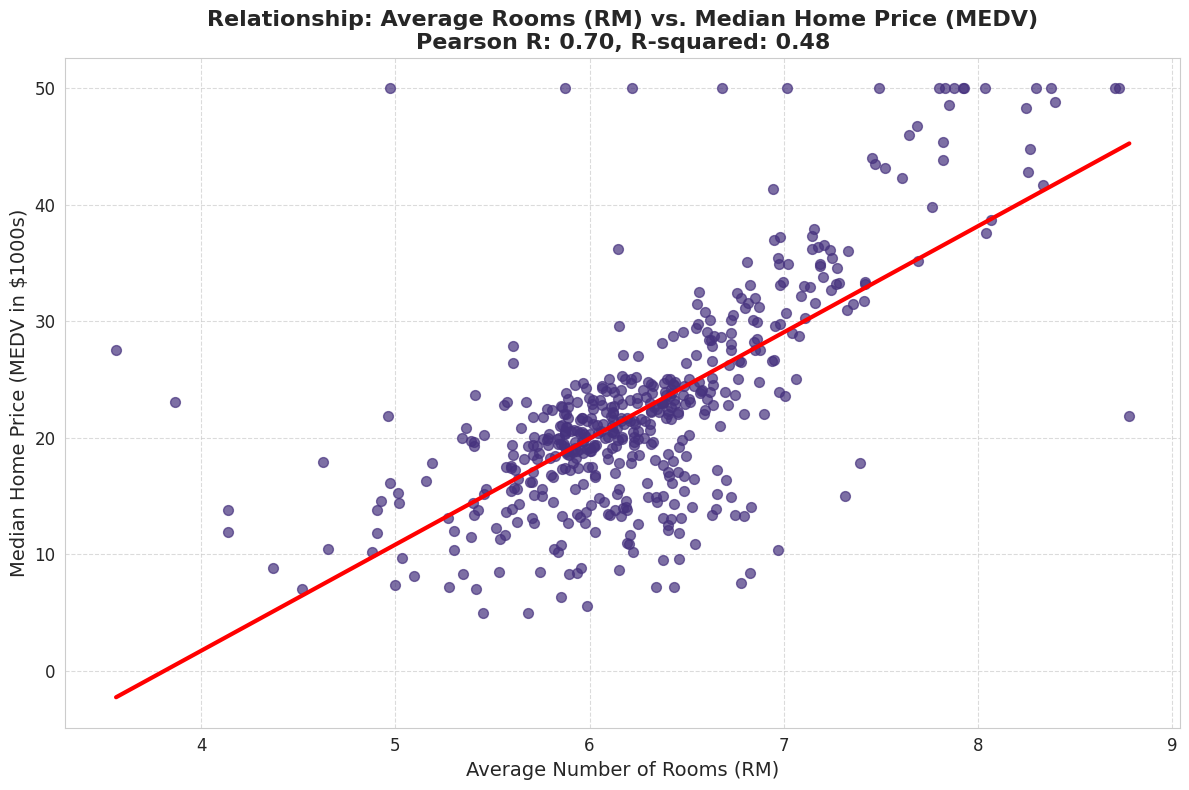

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset to ensure 'data' DataFrame is available
data = pd.read_csv('boston-housing-dataset.csv')

# Set a style for better presentation aesthetics
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Calculate Pearson Correlation
correlation_rm_medv = data['RM'].corr(data['MEDV'])

# Dynamically calculate R-squared value needed for the plot title
X_for_r_squared = data['RM'].values.reshape(-1, 1)
Y_for_r_squared = data['MEDV'].values
model_for_r_squared = LinearRegression()
model_for_r_squared.fit(X_for_r_squared, Y_for_r_squared)
R_squared_val = model_for_r_squared.score(X_for_r_squared, Y_for_r_squared)

plt.figure(figsize=(12, 8)) # Larger figure size for presentation

# Create the scatter plot with regression line, removing the confidence interval (ci=None)
sns.regplot(x='RM', y='MEDV', data=data,
            scatter_kws={'alpha':0.7, 's':50}, # Adjust scatter point aesthetics
            line_kws={'color':'red', 'lw':3},
            ci=None) # Set ci=None to remove the confidence interval

plt.title(f'Relationship: Average Rooms (RM) vs. Median Home Price (MEDV)\nPearson R: {correlation_rm_medv:.2f}, R-squared: {R_squared_val:.2f}',
          fontsize=16, weight='bold')
plt.xlabel('Average Number of Rooms (RM)', fontsize=14)
plt.ylabel('Median Home Price (MEDV in $1000s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot for presentation use
plot_filename = 'presentation_RM_MEDV_scatter_plot.png'
plt.savefig(plot_filename, dpi=300) # High resolution for presentation
print(f"Plot saved as '{plot_filename}'")

plt.show()

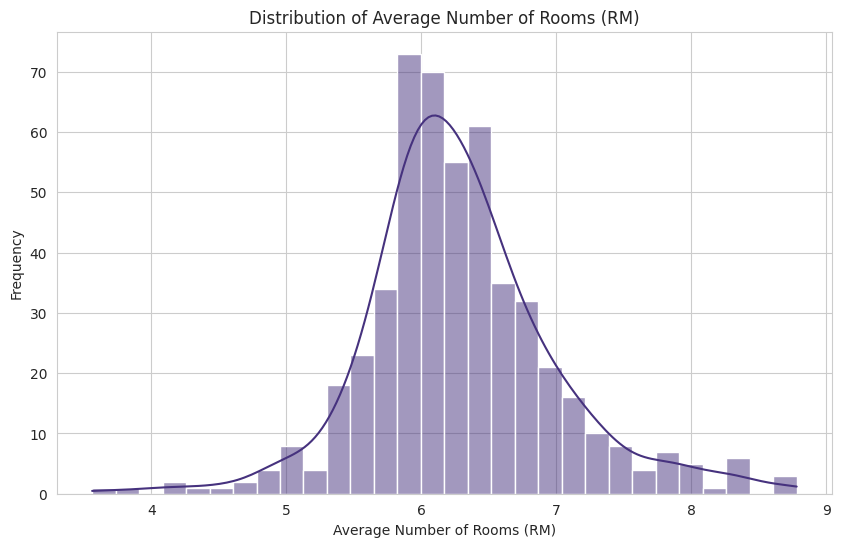

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['RM'], kde=True, bins=30)
plt.title('Distribution of Average Number of Rooms (RM)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

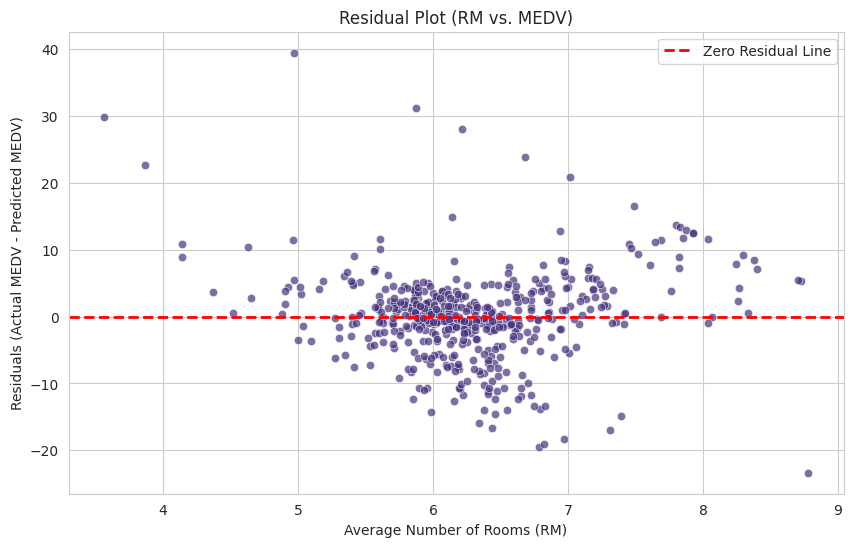

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure model, X_filtered, and Y_filtered are available from previous cells
# If this cell is run independently, these variables might need to be re-initialized or re-calculated.
# Assuming the execution state from NbwQdLsHHbZw is active.

# Calculate predicted values
Y_predicted = model.predict(X_filtered)

# Calculate residuals
residuals = Y_filtered - Y_predicted

plt.figure(figsize=(10, 6))
# Plotting residuals against the independent variable (RM)
sns.scatterplot(x=X_filtered.flatten(), y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.title('Residual Plot (RM vs. MEDV)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Residuals (Actual MEDV - Predicted MEDV)')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation of the p-value for RM (using filtered data)

The p-value helps us assess the statistical significance of the independent variable (RM) in predicting the dependent variable (MEDV).

*   **Null Hypothesis (H₀):** There is no linear relationship between RM and MEDV (i.e., the coefficient of RM is zero).
*   **Alternative Hypothesis (H₁):** There is a linear relationship between RM and MEDV (i.e., the coefficient of RM is not zero).

If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis, suggesting that the observed relationship is statistically significant and not due to random chance.

From the output above, let's look at the p-value for the `RM` coefficient (often labeled as `X1` in the `statsmodels` summary table). If this p-value is very small (e.g., less than 0.05), it indicates strong evidence against the null hypothesis, meaning that the number of rooms is a statistically significant predictor of median sales price even after filtering the data. This further strengthens our conclusion that house size has a positive linear relationship with its median sales price.

# Task
Perform data preparation and exploratory data analysis on the `boston-housing-dataset.csv` dataset. This includes inspecting its structure, checking for and removing duplicates, generating descriptive statistics, visualizing feature distributions, and analyzing feature correlations.

## Inspect Data

### Subtask:
Display basic information about the `data` DataFrame, including its shape, data types, and a summary of missing values, using `data.info()` and `data.isnull().sum()`.


**Reasoning**:
To display basic information about the `data` DataFrame as requested, I will use `data.shape` for dimensions, `data.info()` for data types and non-null counts, and `data.isnull().sum()` for missing values.



In [ ]:
print("Shape of the DataFrame:", data.shape)
print("\nInformation about the DataFrame:")
data.info()
print("\nMissing values per column:")
print(data.isnull().sum())

Shape of the DataFrame: (506, 15)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB

Missing values per column:
Unnamed: 0    0
CRIM          0
ZN            0
IN

## Check and Remove Duplicates

### Subtask:
Identify and remove any duplicate rows in the `data` DataFrame to ensure data integrity. Display the number of duplicates found and the DataFrame's shape after removal.


**Reasoning**:
To address the subtask, I will first identify and print the number of duplicate rows using `.duplicated().sum()`, then remove them in-place with `.drop_duplicates(inplace=True)`, and finally display the updated DataFrame shape.



In [ ]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

print("Shape of the DataFrame after removing duplicates:", data.shape)

Number of duplicate rows found: 0
No duplicate rows found.
Shape of the DataFrame after removing duplicates: (506, 15)


# Task
Generate descriptive statistics for all numerical columns in the `data` DataFrame using `data.describe()`.

## Generate Descriptive Statistics

### Subtask:
Calculate and display descriptive statistics for all numerical columns in the `data` DataFrame using `data.describe()`.


**Reasoning**:
To fulfill the subtask of calculating and displaying descriptive statistics for all numerical columns, I will use `data.describe()` and then print the output.



In [ ]:
print("Descriptive statistics for the DataFrame:")
print(data.describe())

Descriptive statistics for the DataFrame:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154 

## Visualize Feature Distributions

### Subtask:
Create histograms or density plots for key numerical features to visualize their distributions. Include appropriate labels and a legend.


**Reasoning**:
To visualize the distributions of numerical features, I will first identify the numerical columns, excluding 'Unnamed: 0', and then iterate through them to create and display individual histograms with appropriate titles and labels.



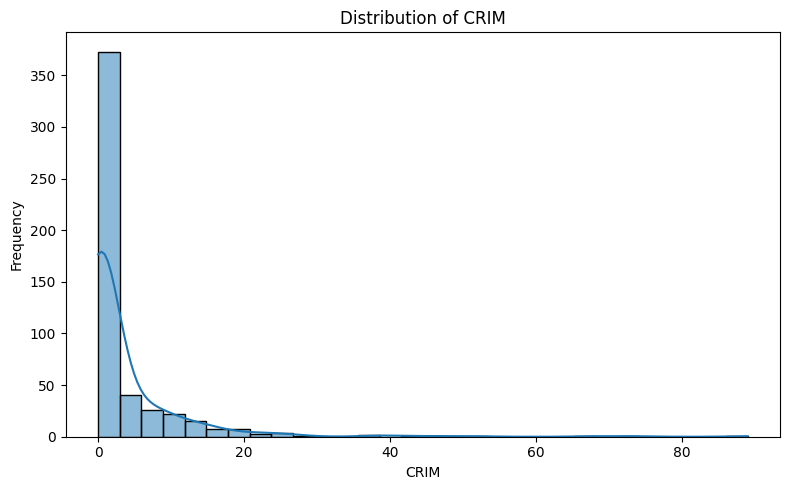

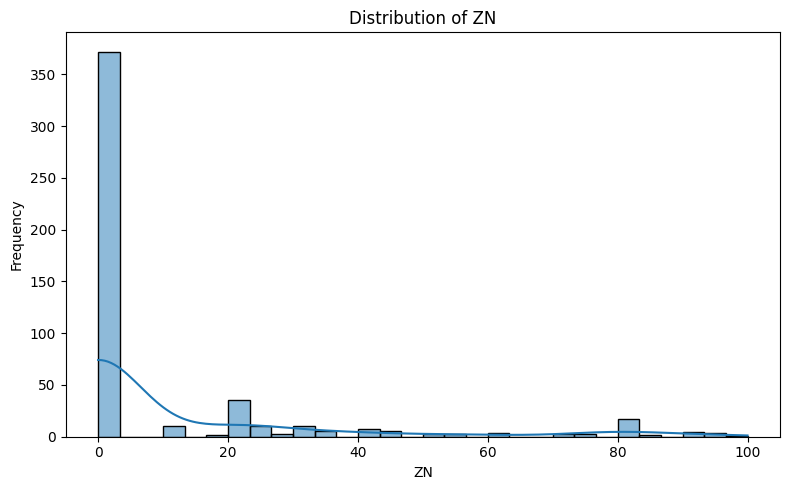

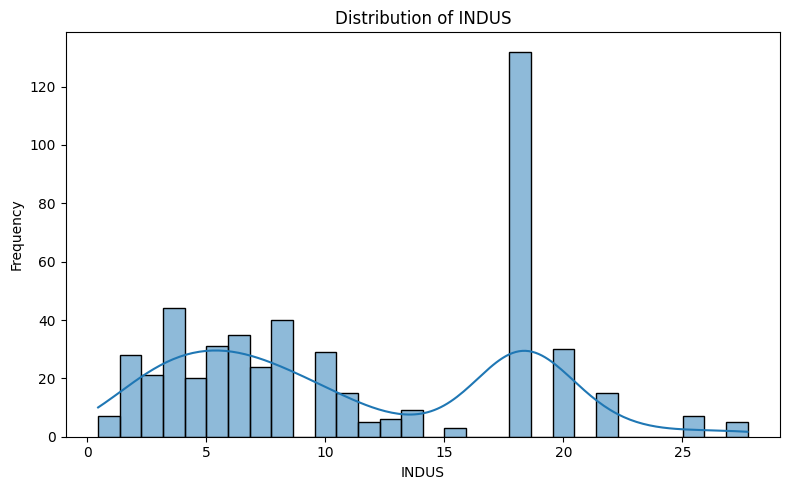

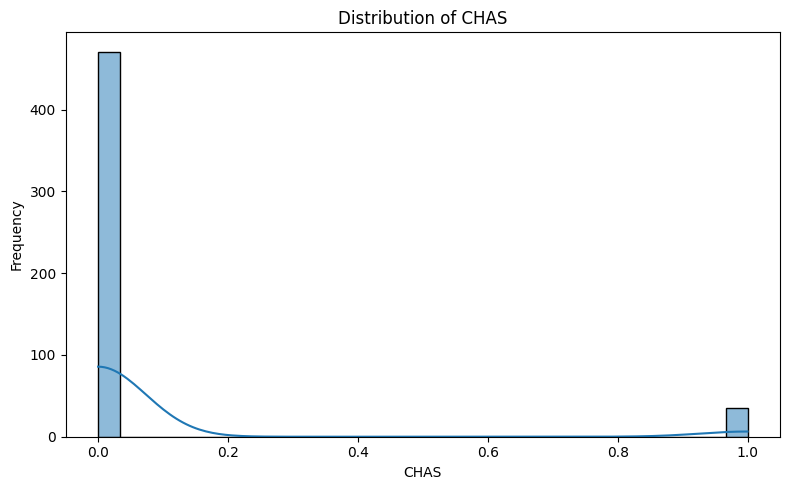

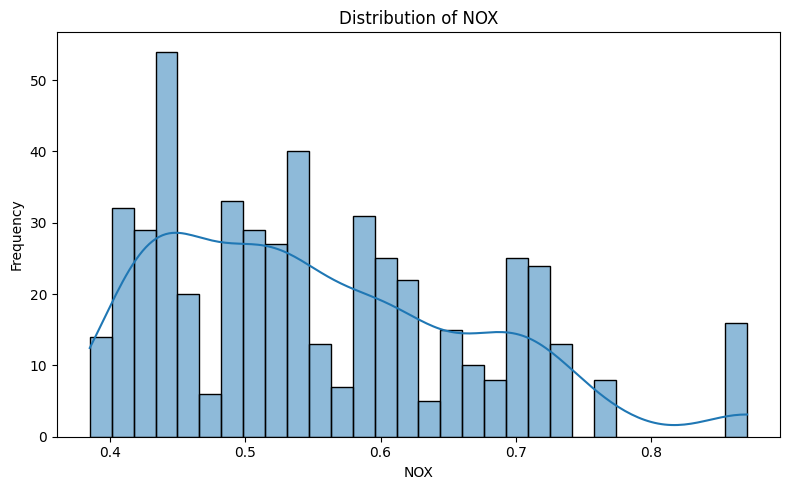

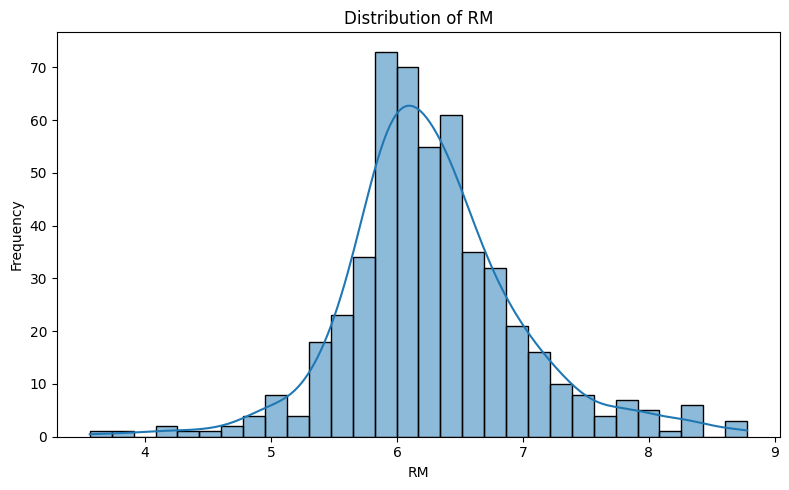

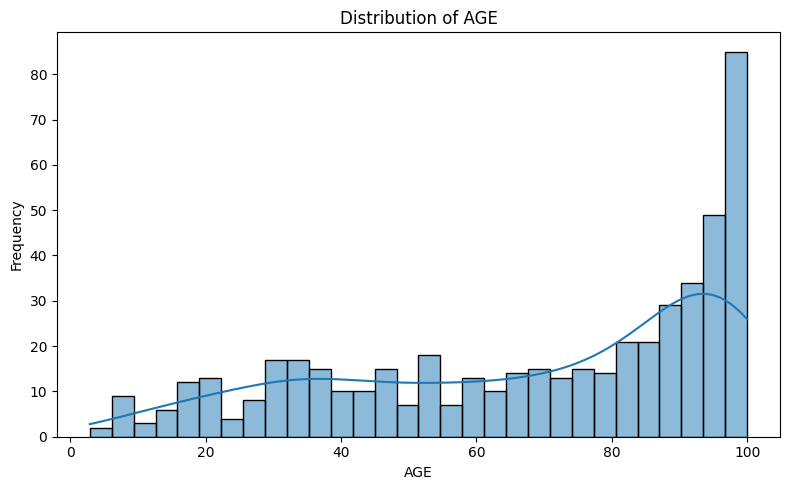

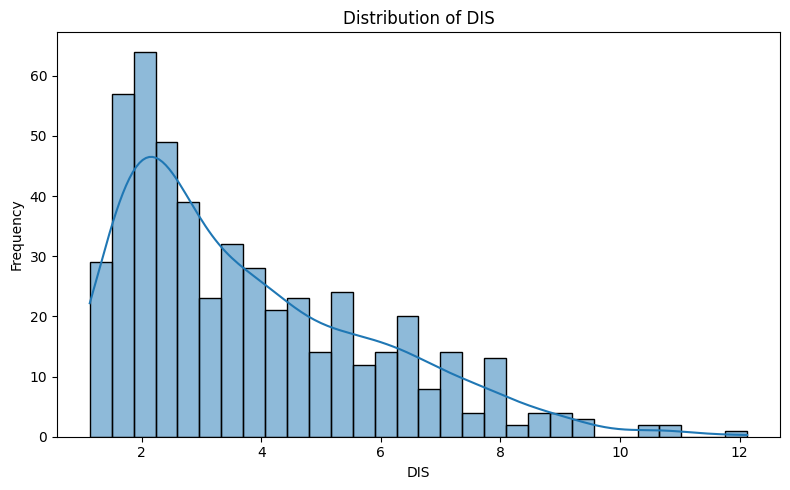

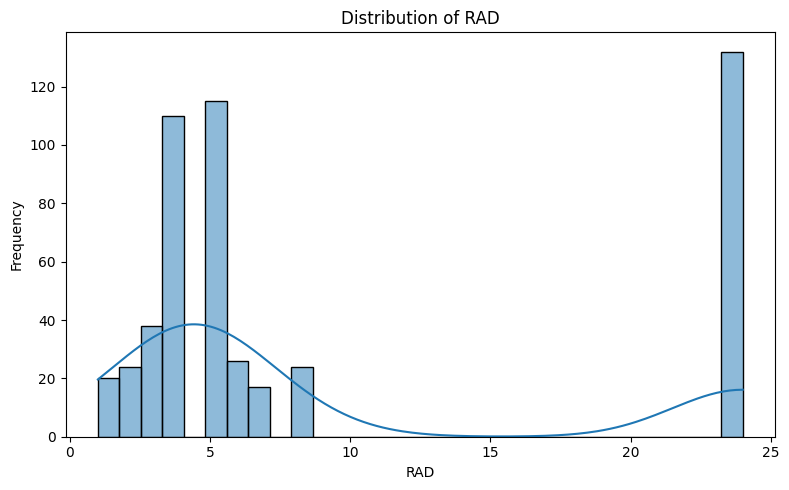

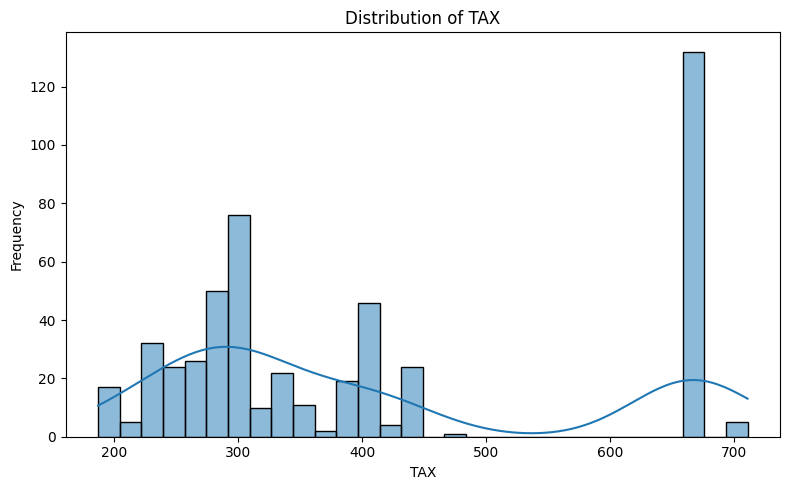

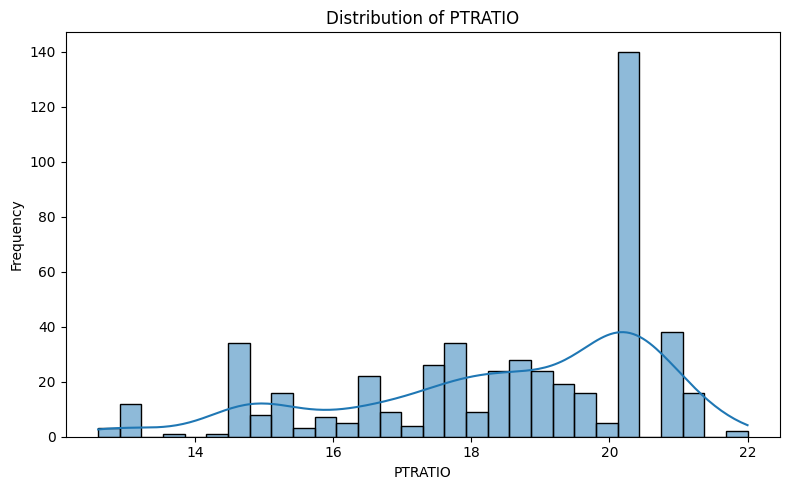

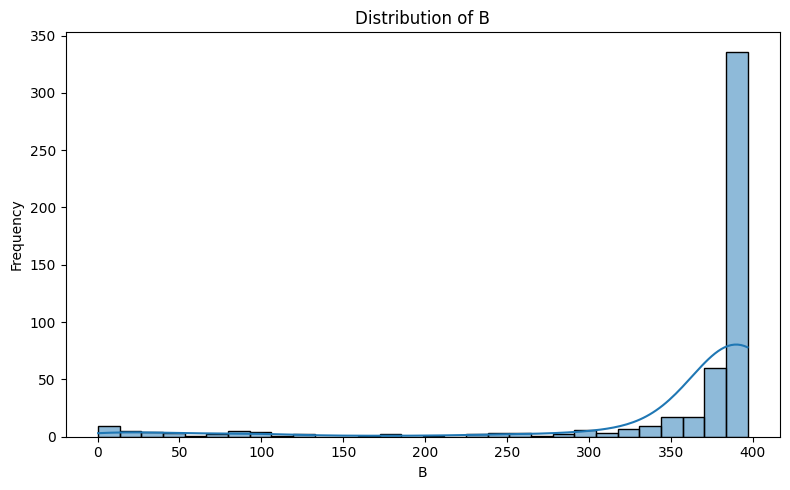

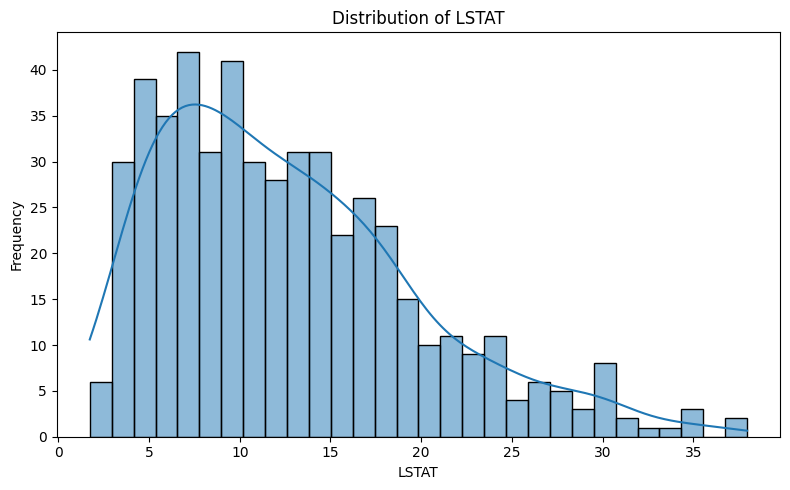

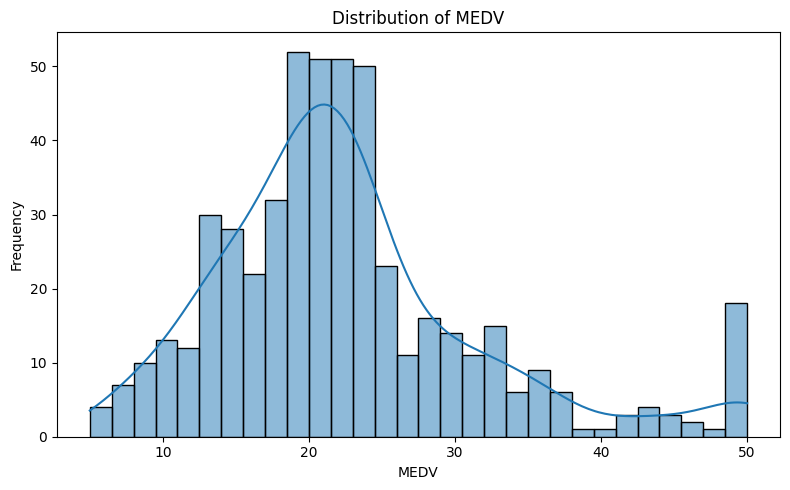

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Analyze Feature Correlations

### Subtask:
Compute the correlation matrix of the numerical features and visualize it using a heatmap to identify relationships between variables. Include a color bar and clear labels.


**Reasoning**:
To analyze the relationships between numerical features, I will compute their correlation matrix and visualize it as a heatmap with annotations and a color bar for clarity.



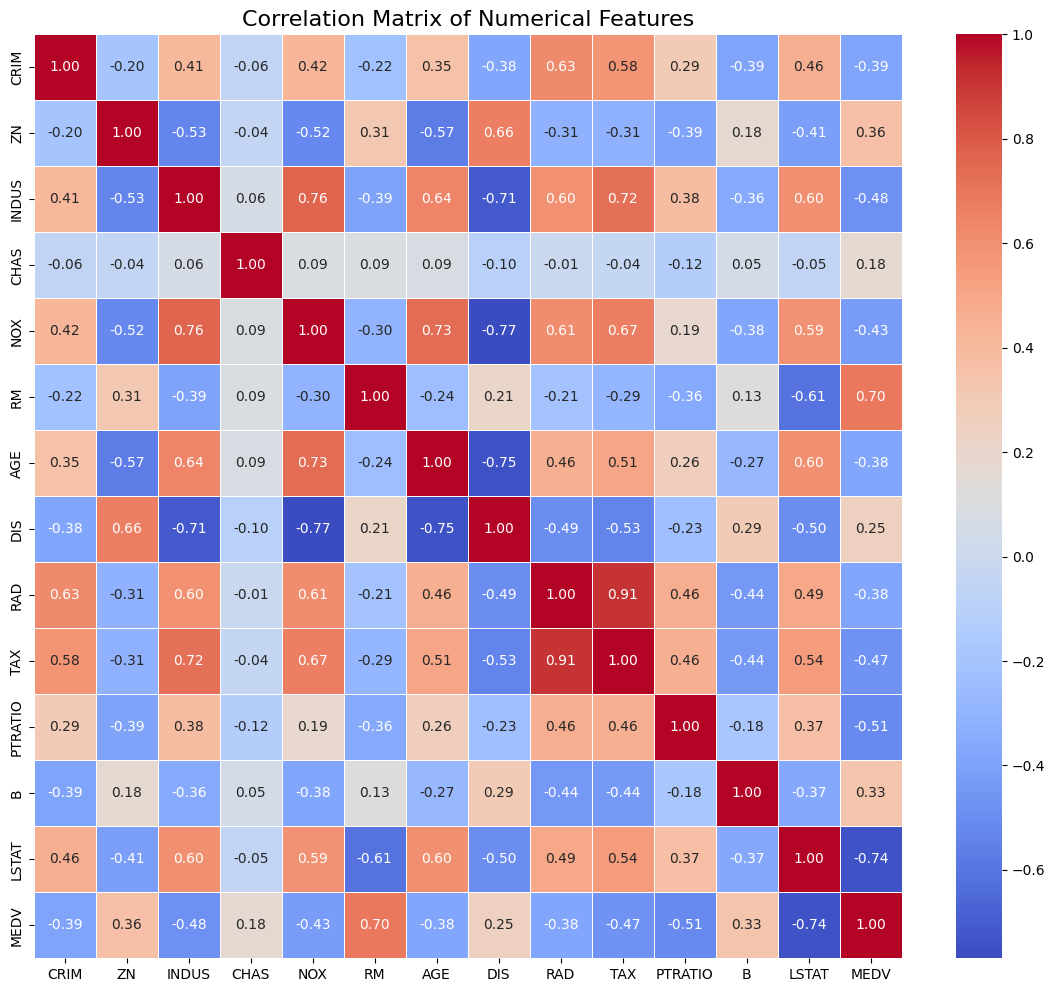

In [ ]:
numerical_cols_for_corr = data.select_dtypes(include=np.number).columns.tolist()
if 'Unnamed: 0' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('Unnamed: 0')

correlation_matrix = data[numerical_cols_for_corr].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Final Task

### Subtask:
Review the descriptive statistics, feature distributions, and correlations to understand the dataset's characteristics and relationships.


## Summary:

### Data Analysis Key Findings

*   **Descriptive Statistics and Distributions:**
    *   Several features, including `CRIM`, `ZN`, `LSTAT`, `TAX`, and `RAD`, exhibit significant right-skewness, indicating a concentration of values at the lower end and a long tail of higher values. For instance, `CRIM` has a mean of 3.61 but a maximum of 88.97.
    *   The `CHAS` variable is highly imbalanced, with a mean of approximately 0.069, suggesting that only about 6.9\% of properties border the Charles River.
    *   The target variable, `MEDV` (median value of owner-occupied homes), has a mean of approximately 22.53 with a standard deviation of 9.19, ranging from 5.0 to 50.0. Its distribution also appears to be somewhat skewed and potentially capped at its maximum value.
*   **Feature Correlations:**
    *   `MEDV` shows a strong positive correlation with `RM` (average number of rooms per dwelling) at approximately 0.70, indicating that houses with more rooms tend to have higher values.
    *   `MEDV` is strongly negatively correlated with `LSTAT` (percentage of lower status population) at approximately -0.74, `PTRATIO` (pupil-teacher ratio) at -0.51, `INDUS` (proportion of non-retail business acres) at -0.48, and `NOX` (nitric oxides concentration) at -0.43.
    *   Significant multicollinearity is observed between several independent variables: `TAX` and `RAD` exhibit a very strong positive correlation of 0.91, while `NOX` and `INDUS` also show a strong positive correlation of 0.76.

### Insights or Next Steps

*   **Insight:** The presence of skewed distributions, potential outliers, and high multicollinearity among features suggests that preprocessing steps such as data transformation (e.g., log transforms for skewed features) and careful consideration of multicollinearity (e.g., through feature selection or regularization) will be crucial for building robust predictive models.
*   **Next Steps:** Conduct outlier detection and handling. Subsequently, evaluate the need for feature engineering or dimensionality reduction techniques to address multicollinearity and potentially improve model performance, especially before applying linear models.


# Task
Generate a scatter plot to visualize the relationship between 'RM' (number of rooms) and 'MEDV' (median sales price), including a regression line, appropriate labels, and a title. Additionally, calculate and display the Pearson correlation coefficient specifically between 'RM' and 'MEDV', interpreting the result.

## Visualize RM vs. MEDV

### Subtask:
Create a scatter plot to visualize the relationship between 'RM' (number of rooms, as a proxy for house size) and 'MEDV' (median sales price). Add a regression line to observe the linear trend and ensure appropriate labels and title.


**Reasoning**:
To visualize the relationship between 'RM' and 'MEDV' with a regression line, I will use `seaborn.regplot()` and then set the plot title and axis labels for clarity.



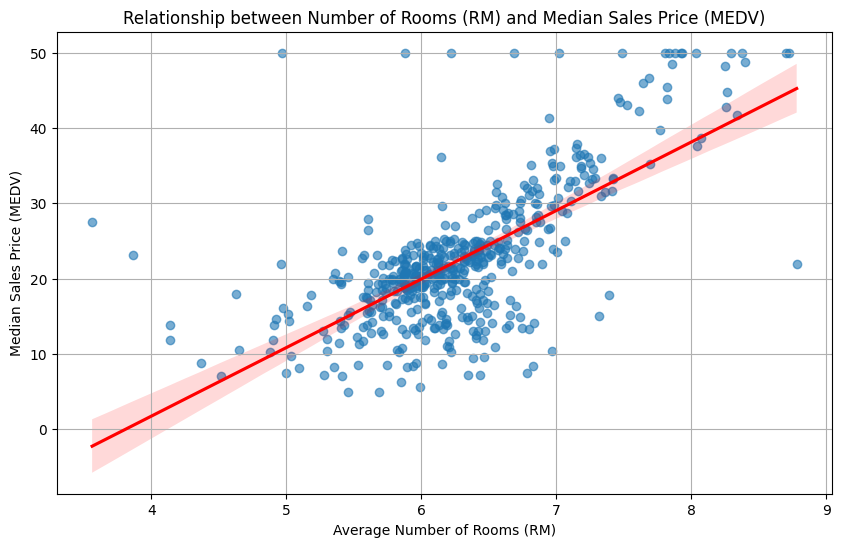

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='RM', y='MEDV', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Number of Rooms (RM) and Median Sales Price (MEDV)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Sales Price (MEDV)')
plt.grid(True)
plt.show()

**Reasoning**:
To complete the task, I will calculate the Pearson correlation coefficient between 'RM' and 'MEDV' and then display and interpret the result.



In [ ]:
correlation_rm_medv = data['RM'].corr(data['MEDV'])
print(f"Pearson Correlation between RM and MEDV: {correlation_rm_medv:.4f}")

if correlation_rm_medv > 0.7:
    print("Interpretation: There is a very strong positive linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv >= 0.5:
    print("Interpretation: There is a strong positive linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv >= 0.3:
    print("Interpretation: There is a moderate positive linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv > 0:
    print("Interpretation: There is a weak positive linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv == 0:
    print("Interpretation: There is no linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv < -0.7:
    print("Interpretation: There is a very strong negative linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv <= -0.5:
    print("Interpretation: There is a strong negative linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
elif correlation_rm_medv <= -0.3:
    print("Interpretation: There is a moderate negative linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")
else:
    print("Interpretation: There is a weak negative linear relationship between the average number of rooms (RM) and the median sales price (MEDV).")

Pearson Correlation between RM and MEDV: 0.6954
Interpretation: There is a strong positive linear relationship between the average number of rooms (RM) and the median sales price (MEDV).


## Final Task

### Subtask:
Summarize the findings from the exploratory data analysis regarding the relationship between house size (RM) and median sales price (MEDV), and discuss how these findings support or challenge the research question.


## Summary:

### Data Analysis Key Findings
*   A scatter plot visualizing the relationship between the average number of rooms (RM) and the median sales price (MEDV) showed an upward trend, confirmed by a regression line.
*   The Pearson correlation coefficient between 'RM' and 'MEDV' was calculated as 0.6954.
*   This correlation indicates a strong positive linear relationship, suggesting that as the average number of rooms in a house increases, the median sales price tends to increase significantly.

### Insights or Next Steps
*   The strong positive correlation between 'RM' and 'MEDV' suggests that the number of rooms is a crucial factor influencing house prices in the dataset. This finding strongly supports the idea that house size (proxied by RM) is a primary driver of median sales price.
*   Given this strong relationship, further analysis could involve developing a predictive model, such as a simple linear regression, to quantify the impact of 'RM' on 'MEDV' and estimate price changes based on room count.
